In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape


(10000, 32, 32, 3)

In [ ]:
y_train.shape


(50000, 1)

In [ ]:
y_train[:5]


array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train=y_train.reshape(-1,)

In [ ]:
y_test = y_test.reshape(-1,)


In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

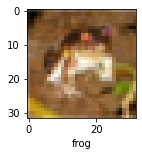

In [ ]:
plot_sample(X_train, y_train, 0)


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 108s 69ms/step - loss: 1.8138 - accuracy: 0.3507
Epoch 2/5
1563/1563 [==============================] - 113s 72ms/step - loss: 1.6240 - accuracy: 0.4276
Epoch 3/5
1563/1563 [==============================] - 111s 71ms/step - loss: 1.5396 - accuracy: 0.4563
Epoch 4/5
1563/1563 [==============================] - 110s 70ms/step - loss: 1.4811 - accuracy: 0.4794
Epoch 5/5
1563/1563 [==============================] - 111s 71ms/step - loss: 1.4343 - accuracy: 0.4949


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.48      0.53      1000
           1       0.67      0.51      0.58      1000
           2       0.49      0.12      0.19      1000
           3       0.26      0.64      0.37      1000
           4       0.47      0.33      0.39      1000
           5       0.56      0.17      0.26      1000
           6       0.42      0.68      0.52      1000
           7       0.68      0.39      0.50      1000
           8       0.58      0.69      0.63      1000
           9       0.48      0.65      0.55      1000

    accuracy                           0.47     10000
   macro avg       0.52      0.47      0.45     10000
weighted avg       0.52      0.47      0.45     10000



In [ ]:
cnn=models.Sequential([
                       
                       #cnn
                       layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
                       layers.MaxPooling2D([2,2]),

                       layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
                       layers.MaxPooling2D([2,2]),

                       #dense
                       layers.Flatten(),
                       layers.Dense(64,activation='relu'),
                       layers.Dense(10,activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train,y_train,epochs=5)  

Epoch 1/5
1563/1563 [==============================] - 67s 42ms/step - loss: 1.5109 - accuracy: 0.4576
Epoch 2/5
1563/1563 [==============================] - 69s 44ms/step - loss: 1.1428 - accuracy: 0.6003
Epoch 3/5
1563/1563 [==============================] - 73s 47ms/step - loss: 1.0146 - accuracy: 0.6442
Epoch 4/5
1563/1563 [==============================] - 79s 51ms/step - loss: 0.9312 - accuracy: 0.6757
Epoch 5/5
1563/1563 [==============================] - 77s 49ms/step - loss: 0.8642 - accuracy: 0.6997


In [ ]:
cnn.evaluate(X_test,y_test)


313/313 [==============================] - 5s 14ms/step - loss: 0.9343 - accuracy: 0.6769


[0.9342976808547974, 0.6769000291824341]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[3.07011447e-04, 1.15708928e-04, 1.95866991e-02, 8.60811234e-01,
        5.17696608e-04, 8.05686936e-02, 1.08401077e-02, 1.84471792e-05,
        2.67352108e-02, 4.99150425e-04],
       [2.09761355e-02, 3.11384439e-01, 2.71219527e-04, 1.58142939e-06,
        1.51186468e-05, 5.50531240e-07, 4.26356443e-08, 1.42145848e-06,
        6.62129343e-01, 5.22014359e-03],
       [5.44912741e-02, 2.92625040e-01, 2.71908520e-03, 1.50475092e-03,
        6.35670091e-04, 2.67875817e-04, 1.01403726e-04, 5.56630199e-04,
        6.19291961e-01, 2.78062876e-02],
       [7.82608569e-01, 1.24037474e-01, 2.77179517e-02, 2.84367194e-03,
        4.21923818e-03, 2.05608638e-04, 1.57846895e-03, 4.67342499e-04,
        5.32138757e-02, 3.10787139e-03],
       [2.61135028e-05, 8.76303020e-05, 1.10974170e-01, 1.56203315e-01,
        3.28341752e-01, 8.79753157e-02, 3.15279186e-01, 1.01021556e-04,
        9.86334635e-04, 2.51270048e-05]], dtype=float32)

In [ ]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[0:5]

[3, 8, 8, 0, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)